 ## Artificial Intelligence Mini Project 2


##### Member
นางสาว ปรริณ คงเจริญเขตร์ รหัสนิสิต 6410451156  
นางสาว  
นาย รัชพล หินซุย 6410450257

ประเทศที่เลือก : สเปน

 ###### Import Library

In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [101]:
df = pd.read_csv('Apple462.csv')

In [102]:
df

,Unnamed: 0,Date,Envi,Fuji,Gala,region
0,0,27/12/2015,1037,54455,48,Spain
1,1,20/12/2015,674,44639,58,Spain
2,2,13/12/2015,795,109150,131,Spain
3,3,6/12/2015,1132,71976,73,Spain
4,4,29/11/2015,941,43838,76,Spain
...,...,...,...,...,...,...
3544,7,4/2/2018,96085,2250967,3253,Portugal
3545,8,28/1/2018,82653,1501055,746,Portugal
3546,9,21/1/2018,46444,1642533,1165,Portugal
3547,10,14/1/2018,39682,818052,1338,Portugal


##### ตัดประเทศให้เหลือแค่สเปน

In [103]:
df = df[df.region == "Spain"]

## Clean Data

##### Drop column "Unnamed: 0", Reset Index, Change Date column to date type

In [104]:
df = df.drop(['Unnamed: 0','region'], axis=1)
df = df.reset_index().drop('index',axis=1)
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df

,Date,Envi,Fuji,Gala
0,2015-12-27,1037,54455,48
1,2015-12-20,674,44639,58
2,2015-12-13,795,109150,131
3,2015-12-06,1132,71976,73
4,2015-11-29,941,43838,76
...,...,...,...,...
164,2018-02-04,7626,195725,144
165,2018-01-28,3101,74627,56
166,2018-01-21,3133,116521,89
167,2018-01-14,2897,76571,44


In [105]:
df['Gala'] = pd.to_numeric(df['Gala'], errors='coerce')
df['Envi'] = pd.to_numeric(df['Envi'], errors='coerce')
df['Fuji'] = pd.to_numeric(df['Fuji'], errors='coerce')

In [106]:
df['Gala'].replace(' ', np.nan, inplace=True)
df['Fuji'].replace(' ', np.nan, inplace=True)
df['Envi'].replace(' ', np.nan, inplace=True)

In [107]:
df.Gala = df['Gala'].interpolate()
df.Fuji = df['Fuji'].interpolate()
df.Envi = df['Envi'].interpolate()

##### แยกสายพันธุ์

In [108]:
envi = df.drop(['Fuji', 'Gala'], axis=1)
fuji = df.drop(['Envi','Gala'],axis=1)
gala = df.drop(['Envi','Fuji'],axis=1)

# Gala

In [109]:
#pd.set_option('display.max_rows', None)
gala

,Date,Gala
0,2015-12-27,48.0
1,2015-12-20,58.0
2,2015-12-13,131.0
3,2015-12-06,73.0
4,2015-11-29,76.0
...,...,...
164,2018-02-04,144.0
165,2018-01-28,56.0
166,2018-01-21,89.0
167,2018-01-14,44.0


In [110]:
gala = gala.set_index('Date')
gala.sort_index(ascending=True)

,Gala
Date,
2015-01-04,50.0
2015-01-11,127.0
2015-01-18,136.0
2015-01-25,164.0
2015-02-01,179.0
...,...
2018-02-25,48.0
2018-03-04,96.0
2018-03-11,70.0


#### Visualize

/usr/local/anaconda3/envs/datascience/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/anaconda3/envs/datascience/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Date', ylabel='Gala'>

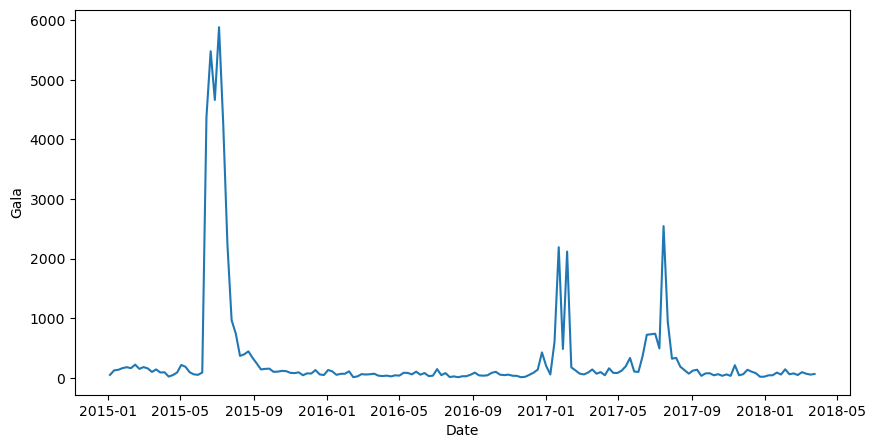

In [111]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=gala, x='Date', y='Gala')

In [112]:
#gala.sort_index(ascending=True)

In [113]:
gala['y'] = gala['Gala'].shift(-1)
gala = gala.drop(gala.tail(1).index)
gala

,Gala,y
Date,,
2015-12-27,48.0,58.0
2015-12-20,58.0,131.0
2015-12-13,131.0,73.0
2015-12-06,73.0,76.0
2015-11-29,76.0,44.0
...,...,...
2018-02-11,61.0,144.0
2018-02-04,144.0,56.0
2018-01-28,56.0,89.0


#### Baseline_pred

In [114]:
gala['baseline_pred'] = gala['Gala']

#### Decision Tree Regressor

In [115]:
from sklearn.tree import DecisionTreeRegressor

X_train = gala['Gala'].values.reshape(-1, 1)
y_train = gala['y'].values.reshape(-1, 1)
X_test = gala['Gala'].values.reshape(-1, 1)


dt_reg = DecisionTreeRegressor(random_state=320)
dt_reg.fit(X_train, y_train)

dt_pred = dt_reg.predict(X_test)

gala['dt_pred'] = dt_pred

In [116]:
gala

,Gala,y,baseline_pred,dt_pred
Date,,,,
2015-12-27,48.0,58.0,48.0,66.500000
2015-12-20,58.0,131.0,58.0,79.000000
2015-12-13,131.0,73.0,131.0,73.000000
2015-12-06,73.0,76.0,73.0,76.000000
2015-11-29,76.0,44.0,76.0,44.000000
...,...,...,...,...
2018-02-11,61.0,144.0,61.0,100.000000
2018-02-04,144.0,56.0,144.0,56.000000
2018-01-28,56.0,89.0,56.0,76.000000


#### Gradient Boosting

In [117]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=320)
gbr.fit(X_train, y=y_train.ravel())
gbr_pred = gbr.predict(X_test)
gala['gbr_pred'] = gbr_pred
gala

,Gala,y,baseline_pred,dt_pred,gbr_pred
Date,,,,,
2015-12-27,48.0,58.0,48.0,66.500000,77.949802
2015-12-20,58.0,131.0,58.0,79.000000,83.200528
2015-12-13,131.0,73.0,131.0,73.000000,108.159524
2015-12-06,73.0,76.0,73.0,76.000000,80.693828
2015-11-29,76.0,44.0,76.0,44.000000,80.693828
...,...,...,...,...,...
2018-02-11,61.0,144.0,61.0,100.000000,83.200528
2018-02-04,144.0,56.0,144.0,56.000000,102.287930
2018-01-28,56.0,89.0,56.0,76.000000,83.200528


### MAPE 

In [118]:
def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    
    # Calculate the absolute percentage error for each data point
    absolute_percentage_error = np.abs((y_true - y_pred) / y_true)
    
    # Compute the mean of the absolute percentage errors
    mean_absolute_percentage_error = np.mean(absolute_percentage_error)
    
    # Convert the mean absolute percentage error to percentage and round to 2 decimal places
    return round(mean_absolute_percentage_error *100, 2)


In [119]:
#def mape(y_true, y_pred):
 #   return round(np.mean(np.abs((y_true - y_pred) / y_true)) * 100, 2)

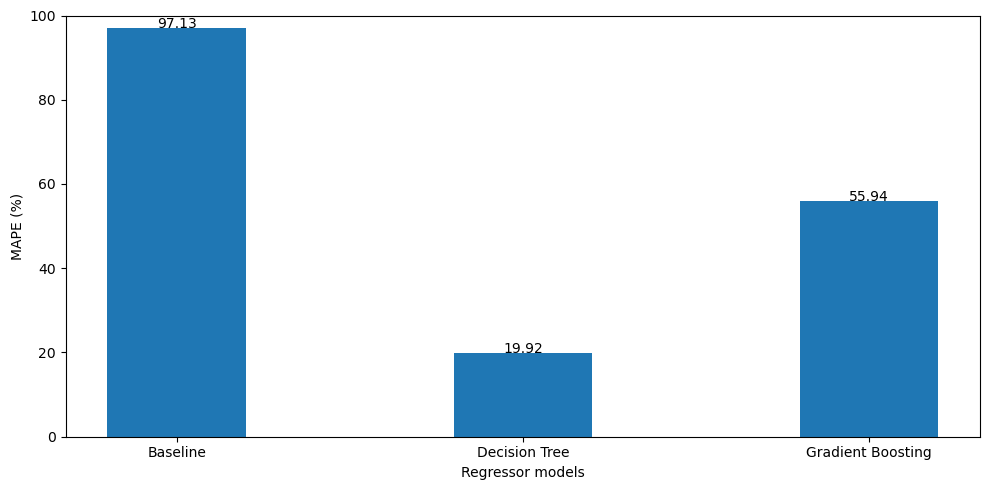

In [120]:
baseline_mape = mape(gala['y'], gala['baseline_pred']) 
dt_mape = mape(gala['y'], gala['dt_pred']) 
gbr_mape = mape(gala['Gala'], gala['gbr_pred']) 

# Bar plot data
x = ['Baseline', 'Decision Tree', 'Gradient Boosting']
y = [baseline_mape, dt_mape, gbr_mape]

# Create a bar plot
fig, ax = plt.subplots(figsize=(10, 5))

ax.bar(x, y, width=0.4)
ax.set_xlabel('Regressor models')
ax.set_ylabel('MAPE (%)')
ax.set_ylim(0, 100)

# Adding text labels to each bar
for index, value in enumerate(y):
    plt.text(x=index, y=value + 0.02, s=str(value), ha='center')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


#### Predict the next time step using a sequence of past observations

In [121]:
def window_input(window_length: int, data: pd.DataFrame) ->pd.DataFrame:
    df= data.copy()
    i = 1
    while i < window_length:
        df[f'x_{i}'] = df['Gala'].shift(-i)
        i = i + 1
    if i == window_length:
        df['y'] = df['Gala'].shift(-i)
# Drop rows where there is a NaN 
    df= df.dropna(axis=0)
    return df

In [122]:
df_gala = df.drop(['Envi','Fuji'],axis=1)

In [123]:
new_gala = window_input(5, df_gala)

In [124]:
new_gala

,Date,Gala,x_1,x_2,x_3,x_4,y
0,2015-12-27,48.0,58.0,131.0,73.0,76.0,44.0
1,2015-12-20,58.0,131.0,73.0,76.0,44.0,93.0
2,2015-12-13,131.0,73.0,76.0,44.0,93.0,80.0
3,2015-12-06,73.0,76.0,44.0,93.0,80.0,85.0
4,2015-11-29,76.0,44.0,93.0,80.0,85.0,113.0
...,...,...,...,...,...,...,...
159,2018-03-11,70.0,96.0,48.0,75.0,61.0,144.0
160,2018-03-04,96.0,48.0,75.0,61.0,144.0,56.0
161,2018-02-25,48.0,75.0,61.0,144.0,56.0,89.0
162,2018-02-18,75.0,61.0,144.0,56.0,89.0,44.0


##### Spilt the data into a traininig and a test set

In [125]:
from sklearn.model_selection import train_test_split

X = new_gala[['Gala', 'x_1', 'x_2', 'x_3', 'x_4']].values
y = new_gala['y'].values

X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=320, shuffle=False)

In [126]:
baseline_pred = []

for row in X_test:
    baseline_pred.append(np.mean(row))

Decision Tree Regressor

In [127]:
dt_reg_5 = DecisionTreeRegressor(random_state=320)
dt_reg_5.fit(X_train, y_train)
dt_reg_5_pred = dt_reg_5.predict(X_test)

Gredient Boosting

In [128]:
gbr_5 = GradientBoostingRegressor(random_state=320)
gbr_5.fit(X_train, y_train.ravel())
gbr_5_pred = gbr_5.predict(X_test)


Evaluation

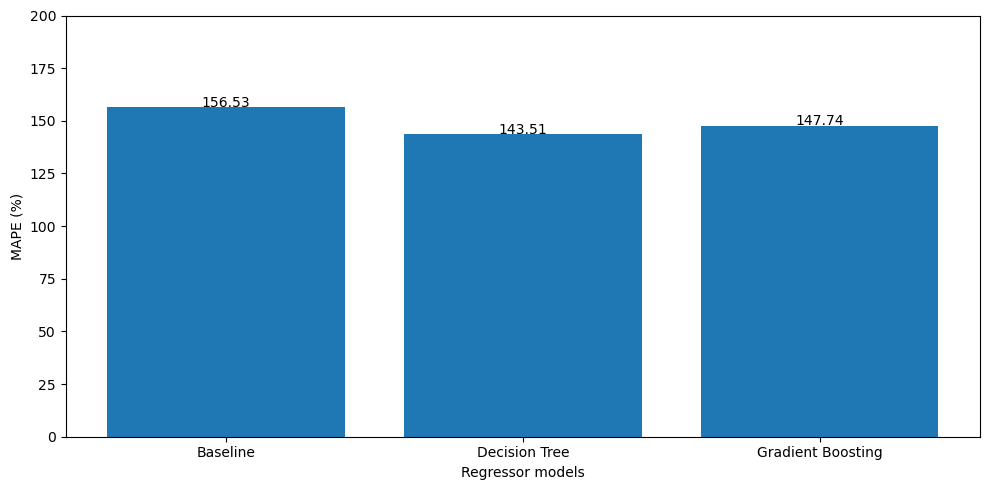

In [129]:
from sklearn.metrics import mean_squared_error, accuracy_score, mean_absolute_percentage_error
# baseline_mape = mean_absolute_percentage_error(y_test, baseline_pred) 
# dt_5_mape = mean_absolute_percentage_error(y_test, dt_reg_5_pred) 
# gbr_5_mape = mean_absolute_percentage_error(y_test, gbr_5_pred) 

baseline_mape = mape(y_test, baseline_pred) 
dt_5_mape = mape(y_test, dt_reg_5_pred) 
gbr_5_mape = mape(y_test, gbr_5_pred) 

x = ['Baseline', 'Decision Tree', 'Gradient Boosting']
y = [baseline_mape, dt_5_mape, gbr_5_mape]

fig, ax = plt.subplots(figsize=(10, 5))

ax.bar(x, y, width=0.8)
ax.set_xlabel('Regressor models')
ax.set_ylabel('MAPE (%)')
ax.set_ylim(0, 200)

for index, value in enumerate(y):
    plt.text(x=index, y=value + 0.1, s=str(value), ha='center')

plt.tight_layout()

plt.show()

Format the dataset

In [130]:
def window_input_output(input_length: int, output_length: int, data: pd.DataFrame) -> pd.DataFrame:
    df = data.copy()
    i = 1
    while i<input_length:
        df[f'x_{i}'] = df['Gala'].shift(-i) 
        i = i + 1
    j = 0
    while j < output_length:
        df[f'y_{j}']=df['Gala'].shift(-output_length-j)
        j = j+1
    df = df.dropna (axis=0)
    return df

In [131]:
seq_gala = window_input_output(26, 26, new_gala)
seq_gala

,Date,Gala,x_1,x_2,x_3,x_4,y,x_5,x_6,x_7,...,y_16,y_17,y_18,y_19,y_20,y_21,y_22,y_23,y_24,y_25
0,2015-12-27,48.0,58.0,131.0,73.0,76.0,44.0,44.0,93.0,80.0,...,159.0,181.0,151.0,222.0,163.0,179.0,164.0,136.0,127.0,50.0
1,2015-12-20,58.0,131.0,73.0,76.0,44.0,93.0,93.0,80.0,85.0,...,181.0,151.0,222.0,163.0,179.0,164.0,136.0,127.0,50.0,427.0
2,2015-12-13,131.0,73.0,76.0,44.0,93.0,80.0,80.0,85.0,113.0,...,151.0,222.0,163.0,179.0,164.0,136.0,127.0,50.0,427.0,139.0
3,2015-12-06,73.0,76.0,44.0,93.0,80.0,85.0,85.0,113.0,117.0,...,222.0,163.0,179.0,164.0,136.0,127.0,50.0,427.0,139.0,87.0
4,2015-11-29,76.0,44.0,93.0,80.0,85.0,113.0,113.0,117.0,105.0,...,163.0,179.0,164.0,136.0,127.0,50.0,427.0,139.0,87.0,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,2017-12-03,136.0,62.0,43.0,213.0,34.0,58.0,58.0,35.0,62.0,...,176.0,2119.0,485.0,2192.0,607.0,57.0,200.0,65.0,55.0,70.0
109,2017-11-26,62.0,43.0,213.0,34.0,58.0,35.0,35.0,62.0,43.0,...,2119.0,485.0,2192.0,607.0,57.0,200.0,65.0,55.0,70.0,96.0
110,2017-11-19,43.0,213.0,34.0,58.0,35.0,62.0,62.0,43.0,78.0,...,485.0,2192.0,607.0,57.0,200.0,65.0,55.0,70.0,96.0,48.0
111,2017-11-12,213.0,34.0,58.0,35.0,62.0,43.0,43.0,78.0,75.0,...,2192.0,607.0,57.0,200.0,65.0,55.0,70.0,96.0,48.0,75.0


In [132]:
from sklearn.model_selection import train_test_split

X_cols = [col for col in seq_gala.columns if col.startswith('x')]
X_cols.insert(0, 'Gala')
y_cols = [col for col in seq_gala.columns if col.startswith('y')]

X = seq_gala[X_cols].values
y = seq_gala[y_cols].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Decision Tree

In [133]:
dt_seq= DecisionTreeRegressor (random_state=42)
dt_seq.fit(X_train, y_train)
dt_seq_preds = dt_seq.predict(X_test)

Regressor Chain

In [134]:
from sklearn.multioutput import RegressorChain
gbr_seq= GradientBoostingRegressor (random_state=42)
chained_gbr = RegressorChain (gbr_seq)
chained_gbr.fit(X_train, y_train)
gbr_seq_preds = chained_gbr.predict(X_test)

Evaluation

In [135]:
mape_dt_seq= mape(dt_seq_preds.reshape(1, -1), y_test.reshape(1,-1))
mape_gbr_seq= mape(gbr_seq_preds.reshape(1, -1), y_test.reshape(1,-1))
y_test = y_test[:, 1:]
mape_baseline = mape(X_test.reshape(1, -1), y_test.reshape(1, -1)) 

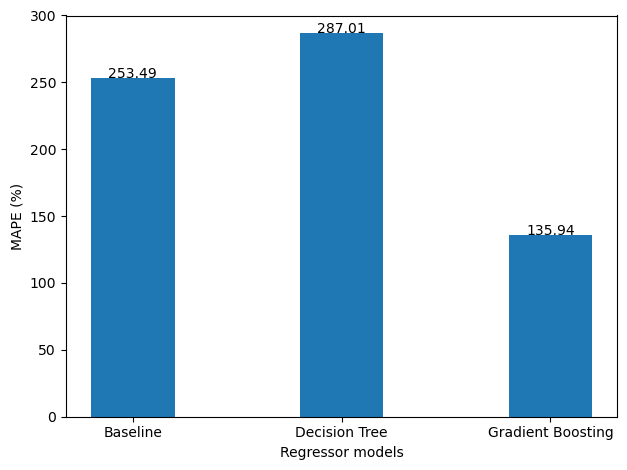

In [136]:
# Generate the bar plot
fig, ax = plt.subplots()
x = ['Baseline', 'Decision Tree', 'Gradient Boosting'] 
y = [mape_baseline, mape_dt_seq, mape_gbr_seq]
ax.bar(x, y, width=0.4) 
ax.set_xlabel('Regressor models')
ax.set_ylabel('MAPE (%)')
ax.set_ylim(0, 300)

for index, value in enumerate(y): 
    plt.text(x=index, y=value + 0.05, s=str(value), ha='center')
    
plt.tight_layout()

Visualize

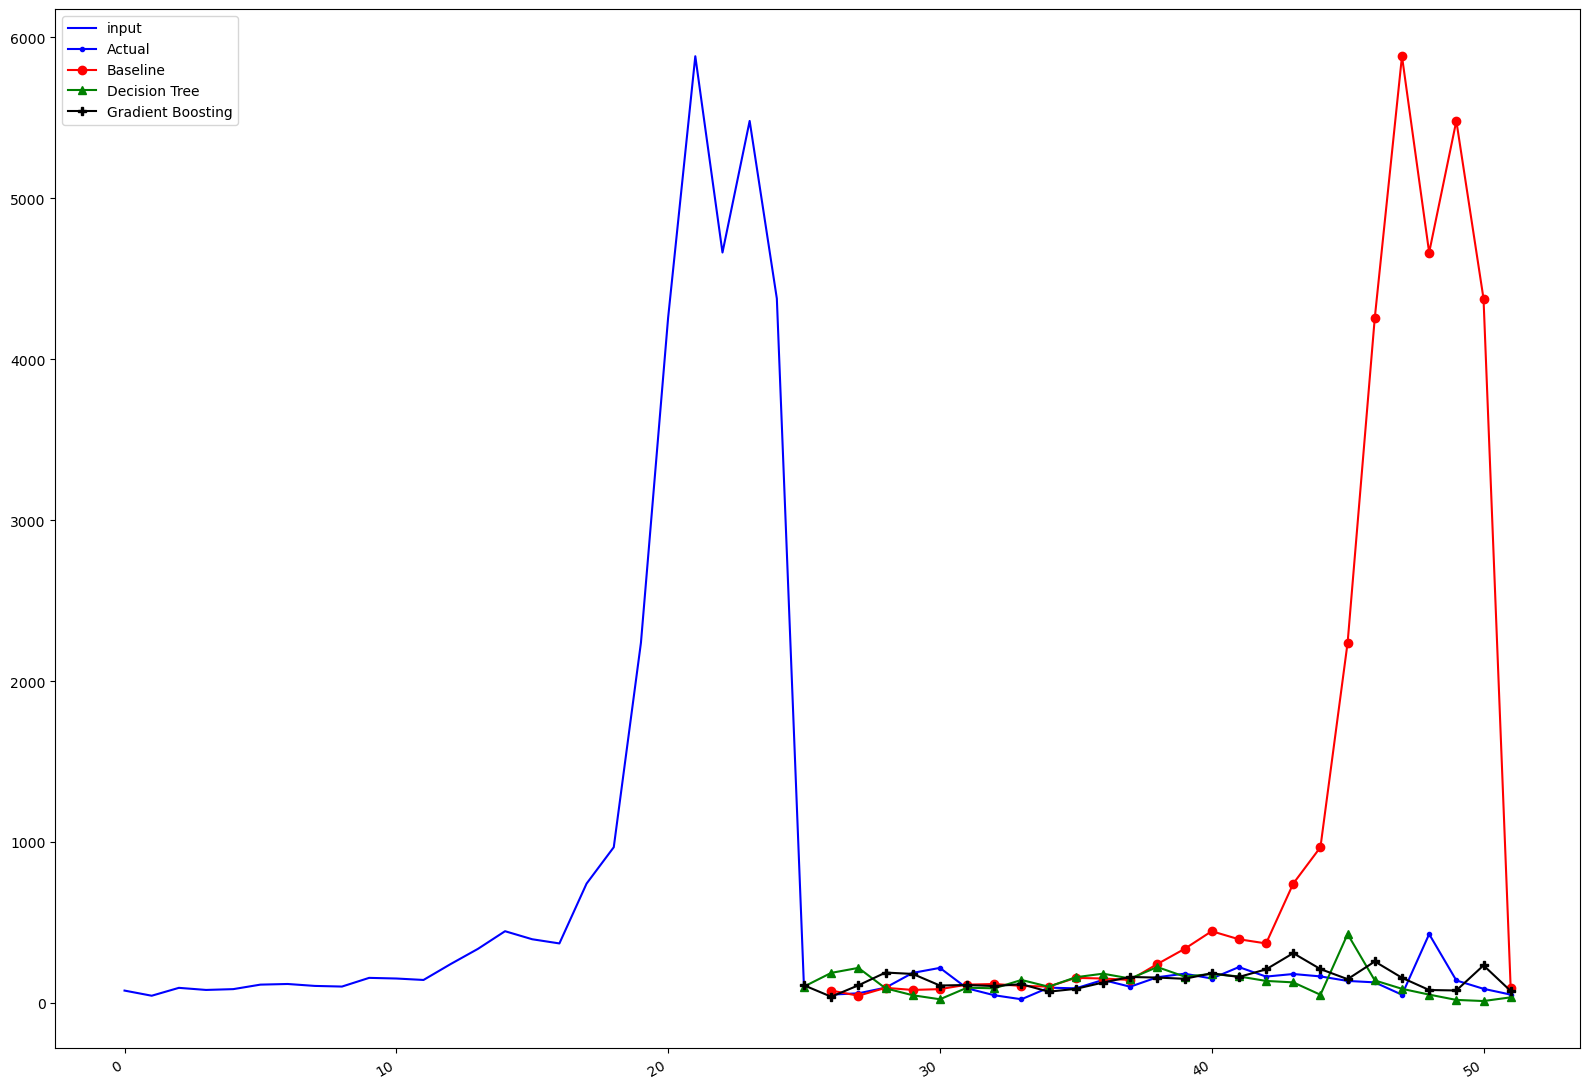

In [137]:
fig, ax = plt.subplots(figsize=(16, 11))
ax.plot(np.arange(0, 26, 1), X_test[1], 'b-', label='input') 
ax.plot(np.arange(26, 52, 1), y_test[1], marker='.', color='blue', label='Actual')
ax.plot(np.arange(26, 52, 1), X_test[1], marker='o', color='red', label='Baseline')
ax.plot(np.arange(25, 52, 1), dt_seq_preds[1], marker='^',color='green', label='Decision Tree')
ax.plot(np.arange(25, 52, 1), gbr_seq_preds [1], marker='P',color='black', label='Gradient Boosting')

#plt.xticks(np.arange(1, 104, 52), np.arange(2000, 2002, 1))
plt.legend (loc=2)
fig.autofmt_xdate()
plt.tight_layout()

# Prediction Modal Envi Apple

In [138]:
envi

,Date,Envi
0,2015-12-27,1037.0
1,2015-12-20,674.0
2,2015-12-13,795.0
3,2015-12-06,1132.0
4,2015-11-29,941.0
...,...,...
164,2018-02-04,7626.0
165,2018-01-28,3101.0
166,2018-01-21,3133.0
167,2018-01-14,2897.0


### Visualize

/usr/local/anaconda3/envs/datascience/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/anaconda3/envs/datascience/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Date', ylabel='Envi'>

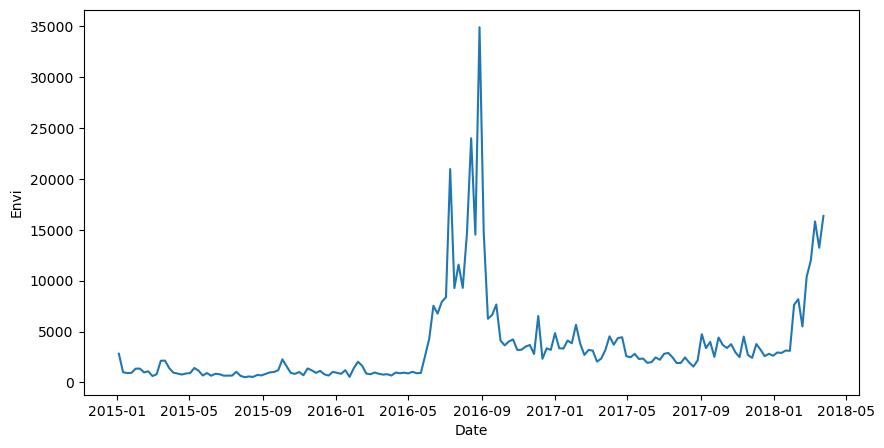

In [139]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=envi, x='Date', y='Envi')

### Change Date to toordinal and Sort Date


In [140]:


# envi['Date'] = envi['Date'].map(dt.datetime.toordinal)

# envi

envi.set_index('Date', inplace=True)
envi.sort_index(ascending=True)
envi

,Envi
Date,
2015-12-27,1037.0
2015-12-20,674.0
2015-12-13,795.0
2015-12-06,1132.0
2015-11-29,941.0
...,...
2018-02-04,7626.0
2018-01-28,3101.0
2018-01-21,3133.0


In [141]:
import datetime as dt

envi.index = envi.index.map(dt.datetime.toordinal)
envi.reset_index(inplace=True)
envi.rename(columns={'index': 'Date'}, inplace=True)
envi


,Date,Envi
0,735959,1037.0
1,735952,674.0
2,735945,795.0
3,735938,1132.0
4,735931,941.0
...,...,...
164,736729,7626.0
165,736722,3101.0
166,736715,3133.0
167,736708,2897.0


### Prepare Train and Test Data

In [142]:
# Split the data into features (X) and target variable (y)


X = envi[['Date']]  # Replace 'feature1', 'feature2', ... with actual feature names
y = envi['Envi']  # Replace 'Envi' with actual target variable name

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=320)

### Decision Tree Regressor


In [143]:
# Create the Decision Tree Regressor model
model_decision = DecisionTreeRegressor(max_depth=7,min_samples_split=3,min_samples_leaf=3)

# Fit the model to the training data
model_decision.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model_decision.predict(X_test)

### Gradient Boosting

In [144]:
model_gradient = GradientBoostingRegressor(n_estimators=100, learning_rate=0.8, max_depth=1, random_state=320)
model_gradient.fit(X_train, y_train)

y_pred_gradient = model_gradient.predict(X_test)

### MAPE

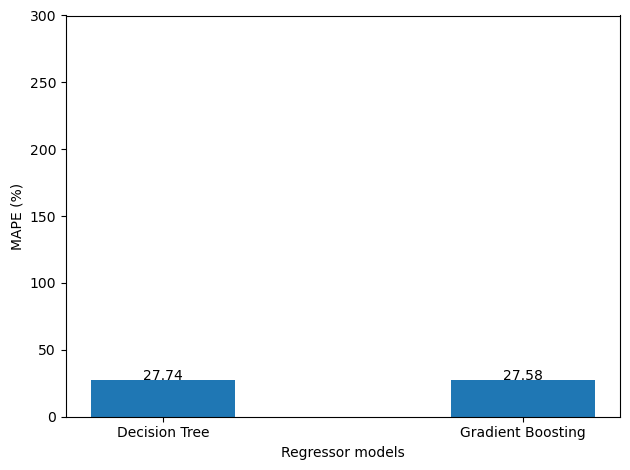

In [145]:
map_decision = mape(y_test, y_pred)
map_gradient = mape(y_test, y_pred_gradient)

# Generate the bar plot
fig, ax = plt.subplots()
x = ['Decision Tree', 'Gradient Boosting']
y = [map_decision, map_gradient]
ax.bar(x, y, width=0.4)
ax.set_xlabel('Regressor models')
ax.set_ylabel('MAPE (%)')
ax.set_ylim(0, 300)

for index, value in enumerate(y):
    plt.text(x=index, y=value + 0.05, s=str(value), ha='center')
    
plt.tight_layout()

### Accurency Between Decision Tree and Gradient Boosting From Test Data

In [146]:
print("Accuracy Decision Tree: {:.2f}%".format(model_decision.score(X_test, y_test) * 100))
print("Accurency Gradient Boosting : {:.2f}%".format(model_gradient.score(X_test, y_test)  * 100))

Accuracy Decision Tree: 91.90%
Accurency Gradient Boosting : 83.46%


### Graph Bar of Decision Tree and Gradient Boosting From Test Data 

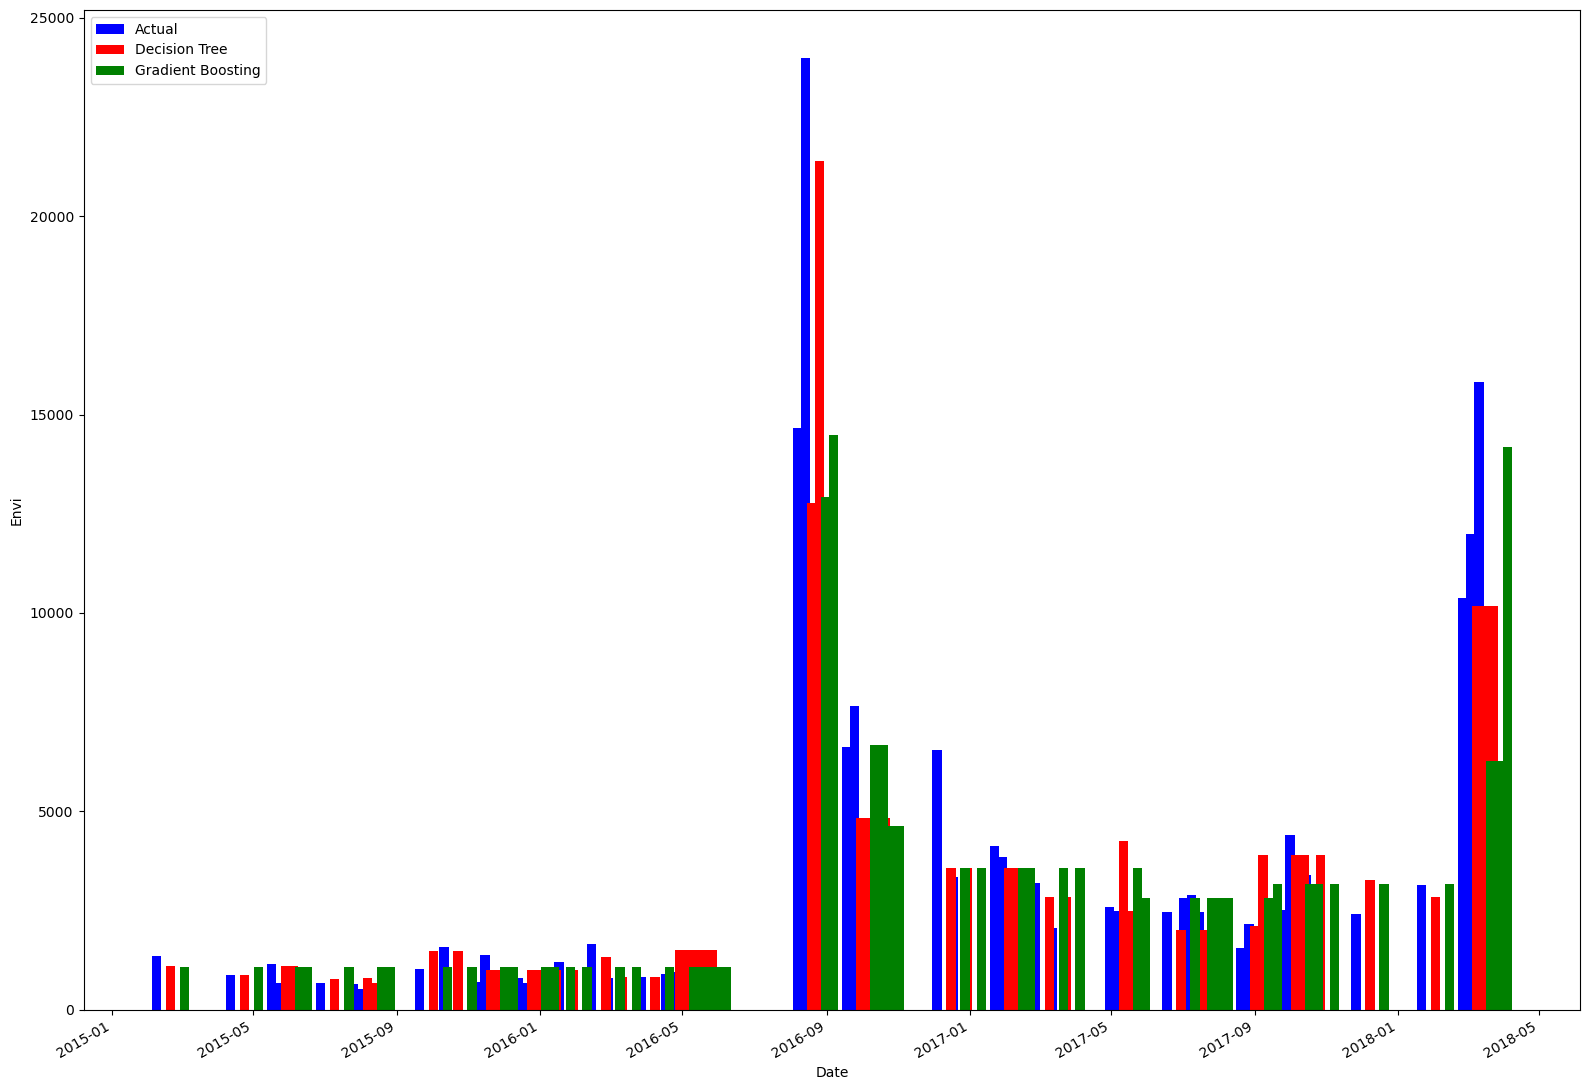

In [147]:

X_test['Date'] = pd.to_datetime(X_test['Date'].apply(dt.datetime.fromordinal))


fig, ax = plt.subplots(figsize=(16, 11))

bar_width = 12
ax.set_xlabel('Date')
ax.set_ylabel('Envi')
ax.bar(X_test['Date'], y_test, color='blue', label='Actual', width=8)
ax.bar(X_test['Date'] + pd.DateOffset(days=bar_width), y_pred, color='red', label='Decision Tree', width=8)
ax.bar(X_test['Date'] + 2*pd.DateOffset(days=bar_width), y_pred_gradient, color='green', label='Gradient Boosting', width=8)


plt.legend(loc=2)
fig.autofmt_xdate()
plt.tight_layout()





### Prediction Demo Envi Apple

#### Model Decision Tree  Predict Demo

In [148]:
inputDate = input("Enter the date in the format 'YYYY-MM-DD' (ex: 2024-01-01): ")

# Input the date
input_date = pd.to_datetime(inputDate, format='%Y-%m-%d')  # Replace '2024-01-01' with the desired date
#27/12/2015
# Convert the input date to the ordinal format
input_date_ordinal = input_date.toordinal()

# Predict the Envi value for the input date
predicted_envi = model_decision.predict([[input_date_ordinal]])

print(predicted_envi[0])

991.375


/usr/local/anaconda3/envs/datascience/lib/python3.11/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


#### Model Gradient Boosting Predict Demo

In [149]:
inputDate = input("Enter the date in the format 'YYYY-MM-DD' (ex: 2024-01-01): ")

# Input the date
input_date = pd.to_datetime(inputDate, format='%Y-%m-%d')  # Replace '2024-01-01' with the desired date
#27/12/2015
# Convert the input date to the ordinal format
input_date_ordinal = input_date.toordinal()

# Predict the Envi value for the input date
predicted_envi = model_gradient.predict([[input_date_ordinal]])

print(predicted_envi[0])

1065.667842226363


/usr/local/anaconda3/envs/datascience/lib/python3.11/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
